<a href="https://colab.research.google.com/github/Vineet3693/Self-made-projects-/blob/main/%22Advanced_Feature_Engineering_%26_Income_Classification%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Generate Sample Dataset for Preprocessing
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

print("=== GENERATING SAMPLE DATASET ===")

# Define dataset parameters
n_samples = 1000

# Generate synthetic data
data = {
    # Numerical features
    'age': np.random.normal(35, 12, n_samples).astype(int),
    'income': np.random.lognormal(10, 0.5, n_samples),
    'experience_years': np.random.exponential(5, n_samples),
    'credit_score': np.random.normal(650, 100, n_samples),
    'hours_worked': np.random.normal(40, 8, n_samples),

    # Categorical features
    'education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'],
                                 n_samples, p=[0.3, 0.4, 0.25, 0.05]),
    'city': np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
                            n_samples, p=[0.25, 0.2, 0.2, 0.15, 0.2]),
    'job_category': np.random.choice(['Tech', 'Finance', 'Healthcare', 'Education', 'Retail'],
                                   n_samples, p=[0.3, 0.2, 0.2, 0.15, 0.15]),
    'marital_status': np.random.choice(['Single', 'Married', 'Divorced'],
                                     n_samples, p=[0.4, 0.5, 0.1]),

    # Binary features
    'has_car': np.random.choice([0, 1], n_samples, p=[0.3, 0.7]),
    'owns_house': np.random.choice([0, 1], n_samples, p=[0.6, 0.4]),
}

# Create DataFrame
df = pd.DataFrame(data)

# Apply realistic constraints
df['age'] = np.clip(df['age'], 18, 70)
df['income'] = np.clip(df['income'], 20000, 200000)
df['experience_years'] = np.clip(df['experience_years'], 0, df['age'] - 18)
df['credit_score'] = np.clip(df['credit_score'], 300, 850)
df['hours_worked'] = np.clip(df['hours_worked'], 20, 60)

# Round numerical values
df['income'] = df['income'].round(2)
df['experience_years'] = df['experience_years'].round(1)
df['credit_score'] = df['credit_score'].round(0).astype(int)
df['hours_worked'] = df['hours_worked'].round(1)

=== GENERATING SAMPLE DATASET ===


In [2]:
# Add some realistic correlations and business logic
print("Adding realistic correlations...")

# Higher education tends to correlate with higher income
education_multiplier = {'High School': 0.8, 'Bachelor': 1.0, 'Master': 1.3, 'PhD': 1.6}
for idx, row in df.iterrows():
    df.loc[idx, 'income'] *= education_multiplier[row['education']]

# Experience correlates with income
df['income'] = df['income'] * (1 + df['experience_years'] * 0.02)

# Tech jobs tend to have higher income
tech_bonus = np.where(df['job_category'] == 'Tech', 1.2, 1.0)
df['income'] = df['income'] * tech_bonus

# House ownership correlates with income and age
house_prob = (df['income'] / 100000 + df['age'] / 100).clip(0, 1)
df['owns_house'] = np.random.binomial(1, house_prob)

# Round income again after adjustments
df['income'] = df['income'].round(2)

Adding realistic correlations...


In [3]:
# Introduce MISSING VALUES (realistic patterns)
print("Introducing missing values...")

# Random missing values in income (some people don't disclose)
missing_income_idx = np.random.choice(df.index, size=int(0.08 * len(df)), replace=False)
df.loc[missing_income_idx, 'income'] = np.nan

# Missing values in credit_score (not everyone has credit history)
missing_credit_idx = np.random.choice(df.index, size=int(0.12 * len(df)), replace=False)
df.loc[missing_credit_idx, 'credit_score'] = np.nan

# Missing values in education (some records incomplete)
missing_edu_idx = np.random.choice(df.index, size=int(0.05 * len(df)), replace=False)
df.loc[missing_edu_idx, 'education'] = np.nan

# Missing values in experience_years
missing_exp_idx = np.random.choice(df.index, size=int(0.06 * len(df)), replace=False)
df.loc[missing_exp_idx, 'experience_years'] = np.nan

# Create a column with many missing values (to demonstrate column dropping)
df['optional_field'] = np.random.choice(['A', 'B', 'C'], n_samples)
many_missing_idx = np.random.choice(df.index, size=int(0.7 * len(df)), replace=False)
df.loc[many_missing_idx, 'optional_field'] = np.nan

Introducing missing values...


In [4]:
# Introduce OUTLIERS (realistic scenarios)
print("Introducing outliers...")

# Some extremely high income outliers (CEOs, lottery winners, etc.)
outlier_income_idx = np.random.choice(df.index, size=int(0.02 * len(df)), replace=False)
df.loc[outlier_income_idx, 'income'] = np.random.uniform(500000, 2000000, len(outlier_income_idx))

# Some very low income outliers (part-time workers, interns)
low_income_idx = np.random.choice(df.index, size=int(0.01 * len(df)), replace=False)
df.loc[low_income_idx, 'income'] = np.random.uniform(5000, 15000, len(low_income_idx))

# Age outliers (very young or old workers)
outlier_age_idx = np.random.choice(df.index, size=int(0.01 * len(df)), replace=False)
df.loc[outlier_age_idx, 'age'] = np.random.choice([16, 17, 75, 80], len(outlier_age_idx))

# Credit score outliers
outlier_credit_idx = np.random.choice(df.index, size=int(0.015 * len(df)), replace=False)
df.loc[outlier_credit_idx, 'credit_score'] = np.random.choice([250, 300, 900], len(outlier_credit_idx))

# Extreme hours worked (workaholics and part-timers)
outlier_hours_idx = np.random.choice(df.index, size=int(0.02 * len(df)), replace=False)
df.loc[outlier_hours_idx, 'hours_worked'] = np.random.choice([10, 15, 80, 90], len(outlier_hours_idx))

Introducing outliers...


In [5]:
# Display dataset information
print("=== DATASET SUMMARY ===")
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")

print("\n=== MISSING VALUES ===")
missing_summary = df.isnull().sum()
print(missing_summary[missing_summary > 0])

print("\n=== SAMPLE DATA ===")
print(df.head(10))

print("\n=== DATA TYPES ===")
print(df.dtypes)

print("\n=== BASIC STATISTICS ===")
print(df.describe())

# Save the dataset
df.to_csv('sample_dataset.csv', index=False)
print(f"\n✅ Sample dataset saved as 'sample_dataset.csv'")
print(f"Dataset ready for preprocessing pipeline!")

=== DATASET SUMMARY ===
Dataset shape: (1000, 12)

Columns: ['age', 'income', 'experience_years', 'credit_score', 'hours_worked', 'education', 'city', 'job_category', 'marital_status', 'has_car', 'owns_house', 'optional_field']

=== MISSING VALUES ===
income               78
experience_years     60
credit_score        119
education            50
optional_field      700
dtype: int64

=== SAMPLE DATA ===
   age        income  experience_years  credit_score  hours_worked  \
0   40   7606.587984               2.6         707.0          38.7   
1   33  33775.020000               0.3           NaN          41.7   
2   42  23646.190000               2.1         614.0          32.1   
3   53           NaN               0.6         680.0          31.9   
4   32  36413.350000               8.3         668.0          28.9   
5   32  34324.100000              14.0         850.0          27.2   
6   53  34737.140000               0.4         685.0          30.3   
7   44  76110.250000              

In [6]:
# Create TARGET VARIABLE (for supervised learning)
print("Creating target variable...")

# Create a binary target based on income threshold (high earner or not)
# This simulates predicting whether someone is a "high earner"
income_threshold = df['income'].quantile(0.7)  # Top 30% earners

# Base probability on income
base_prob = (df['income'] / df['income'].max()).fillna(0.3)

# Adjust probability based on other features
prob_adjustments = (
    (df['education'] == 'PhD') * 0.2 +
    (df['education'] == 'Master') * 0.1 +
    (df['job_category'] == 'Tech') * 0.15 +
    (df['job_category'] == 'Finance') * 0.1 +
    (df['experience_years'] > 10) * 0.1 +
    (df['age'] > 40) * 0.05
).fillna(0)

final_prob = (base_prob + prob_adjustments).clip(0, 1)

# Generate binary target
df['high_earner'] = np.random.binomial(1, final_prob)

print(f"Target variable created: {df['high_earner'].value_counts().to_dict()}")

Creating target variable...
Target variable created: {0: 817, 1: 183}


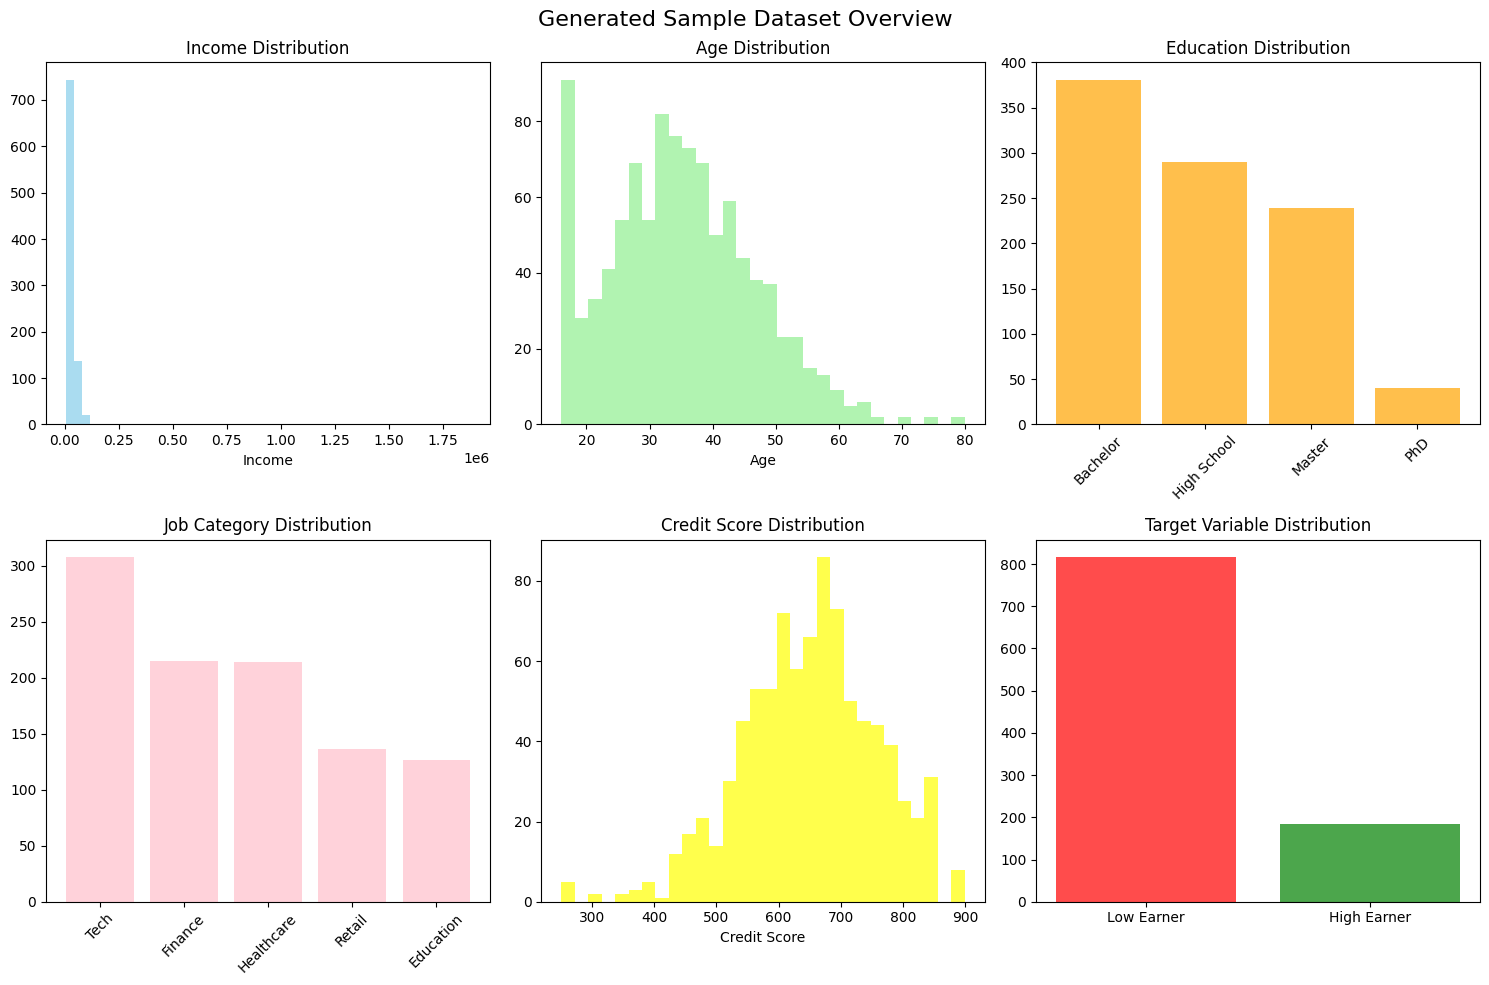

📊 Dataset visualizations displayed!
🚀 Now you can run the preprocessing code with this generated dataset!


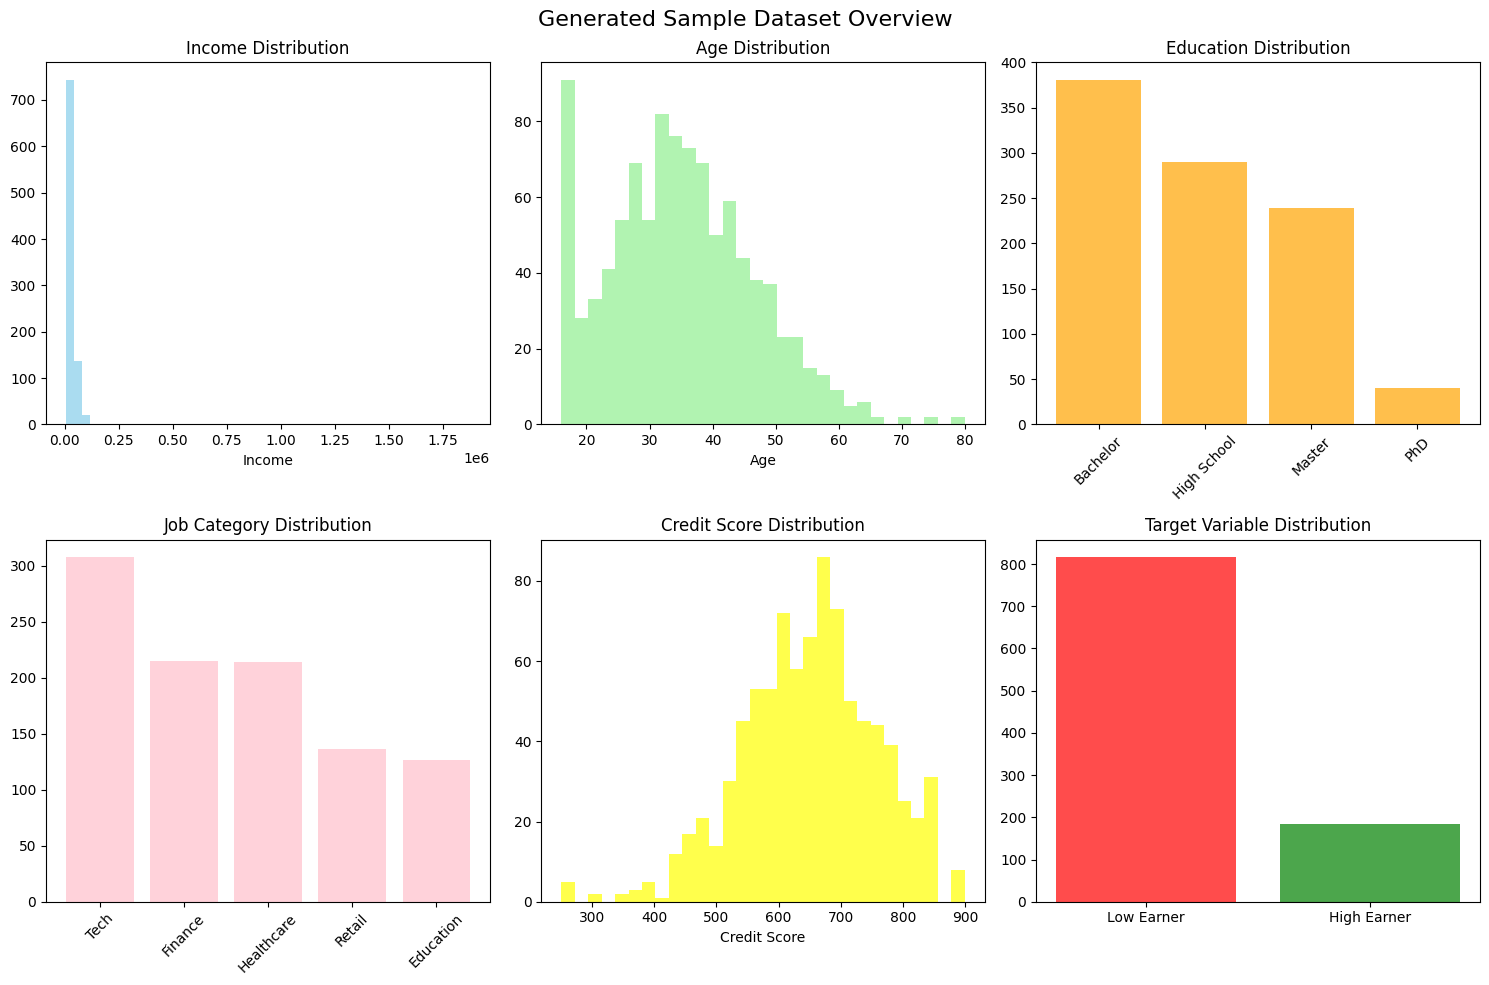

📊 Dataset visualizations displayed!
🚀 Now you can run the preprocessing code with this generated dataset!


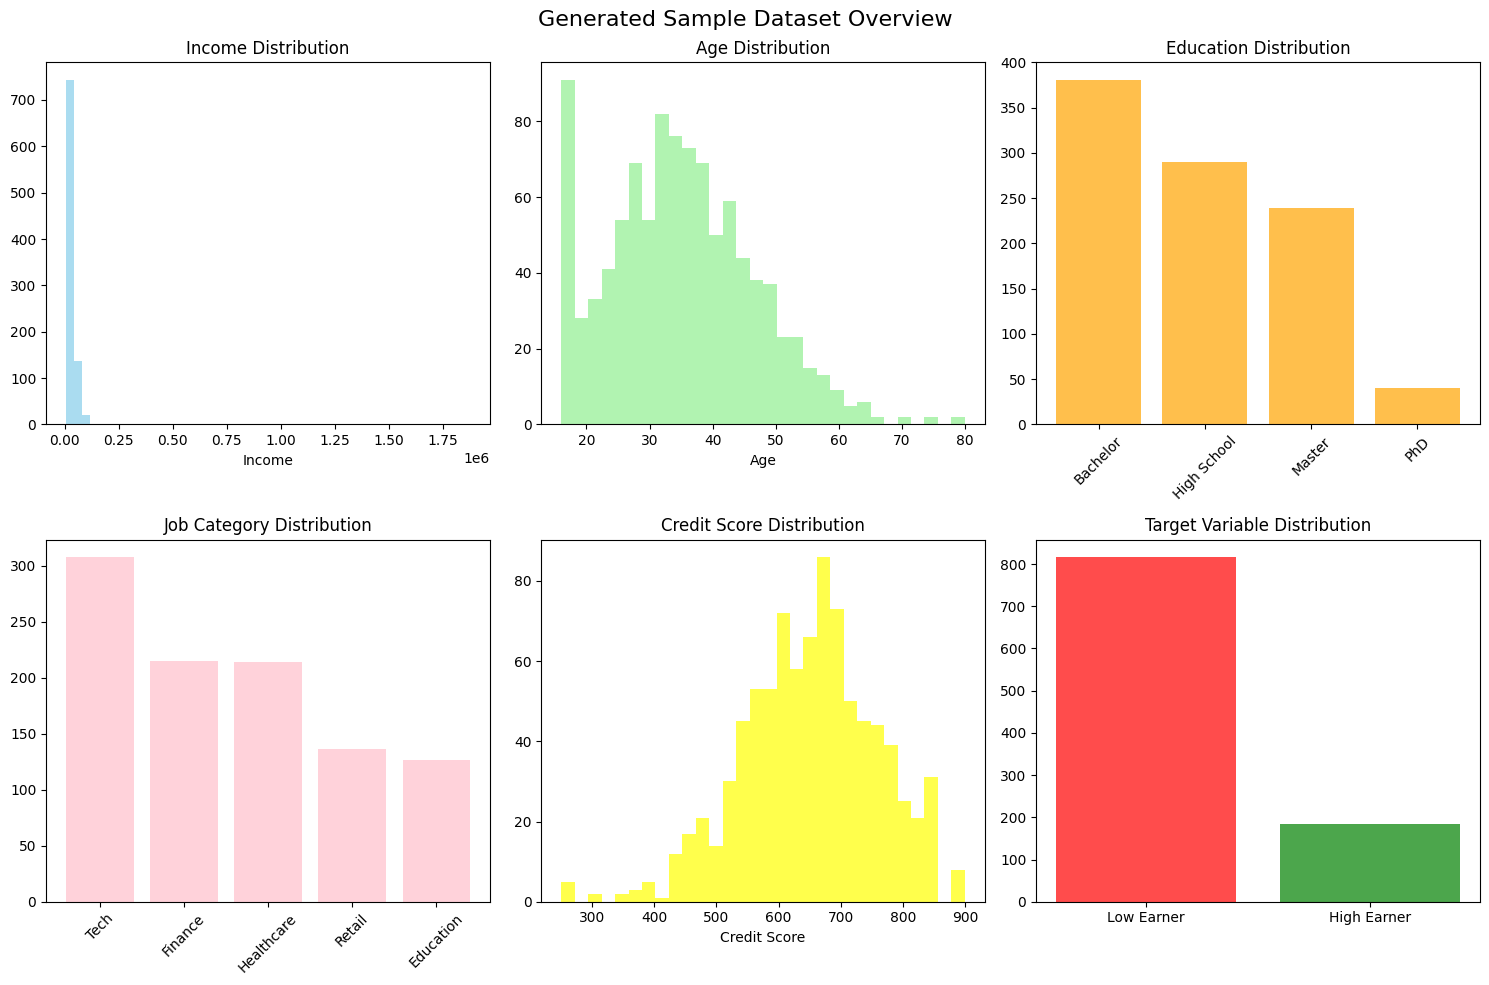

📊 Dataset visualizations displayed!
🚀 Now you can run the preprocessing code with this generated dataset!


In [7]:
# Quick visualization of the generated data
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Generated Sample Dataset Overview', fontsize=16)

# Income distribution
axes[0, 0].hist(df['income'].dropna(), bins=50, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Income Distribution')
axes[0, 0].set_xlabel('Income')

# Age distribution
axes[0, 1].hist(df['age'], bins=30, alpha=0.7, color='lightgreen')
axes[0, 1].set_title('Age Distribution')
axes[0, 1].set_xlabel('Age')

# Education distribution
education_counts = df['education'].value_counts()
axes[0, 2].bar(education_counts.index, education_counts.values, color='orange', alpha=0.7)
axes[0, 2].set_title('Education Distribution')
axes[0, 2].tick_params(axis='x', rotation=45)

# Job category distribution
job_counts = df['job_category'].value_counts()
axes[1, 0].bar(job_counts.index, job_counts.values, color='pink', alpha=0.7)
axes[1, 0].set_title('Job Category Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# Credit score distribution
axes[1, 1].hist(df['credit_score'].dropna(), bins=30, alpha=0.7, color='yellow')
axes[1, 1].set_title('Credit Score Distribution')
axes[1, 1].set_xlabel('Credit Score')

# Target variable distribution
target_counts = df['high_earner'].value_counts()
axes[1, 2].bar(['Low Earner', 'High Earner'], target_counts.values, color=['red', 'green'], alpha=0.7)
axes[1, 2].set_title('Target Variable Distribution')

plt.tight_layout()
plt.show()

print("📊 Dataset visualizations displayed!")
print("🚀 Now you can run the preprocessing code with this generated dataset!")# Quick visualization of the generated data
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Generated Sample Dataset Overview', fontsize=16)

# Income distribution
axes[0, 0].hist(df['income'].dropna(), bins=50, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Income Distribution')
axes[0, 0].set_xlabel('Income')

# Age distribution
axes[0, 1].hist(df['age'], bins=30, alpha=0.7, color='lightgreen')
axes[0, 1].set_title('Age Distribution')
axes[0, 1].set_xlabel('Age')

# Education distribution
education_counts = df['education'].value_counts()
axes[0, 2].bar(education_counts.index, education_counts.values, color='orange', alpha=0.7)
axes[0, 2].set_title('Education Distribution')
axes[0, 2].tick_params(axis='x', rotation=45)

# Job category distribution
job_counts = df['job_category'].value_counts()
axes[1, 0].bar(job_counts.index, job_counts.values, color='pink', alpha=0.7)
axes[1, 0].set_title('Job Category Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# Credit score distribution
axes[1, 1].hist(df['credit_score'].dropna(), bins=30, alpha=0.7, color='yellow')
axes[1, 1].set_title('Credit Score Distribution')
axes[1, 1].set_xlabel('Credit Score')

# Target variable distribution
target_counts = df['high_earner'].value_counts()
axes[1, 2].bar(['Low Earner', 'High Earner'], target_counts.values, color=['red', 'green'], alpha=0.7)
axes[1, 2].set_title('Target Variable Distribution')

plt.tight_layout()
plt.show()

print("📊 Dataset visualizations displayed!")
print("🚀 Now you can run the preprocessing code with this generated dataset!")# Quick visualization of the generated data
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Generated Sample Dataset Overview', fontsize=16)

# Income distribution
axes[0, 0].hist(df['income'].dropna(), bins=50, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Income Distribution')
axes[0, 0].set_xlabel('Income')

# Age distribution
axes[0, 1].hist(df['age'], bins=30, alpha=0.7, color='lightgreen')
axes[0, 1].set_title('Age Distribution')
axes[0, 1].set_xlabel('Age')

# Education distribution
education_counts = df['education'].value_counts()
axes[0, 2].bar(education_counts.index, education_counts.values, color='orange', alpha=0.7)
axes[0, 2].set_title('Education Distribution')
axes[0, 2].tick_params(axis='x', rotation=45)

# Job category distribution
job_counts = df['job_category'].value_counts()
axes[1, 0].bar(job_counts.index, job_counts.values, color='pink', alpha=0.7)
axes[1, 0].set_title('Job Category Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# Credit score distribution
axes[1, 1].hist(df['credit_score'].dropna(), bins=30, alpha=0.7, color='yellow')
axes[1, 1].set_title('Credit Score Distribution')
axes[1, 1].set_xlabel('Credit Score')

# Target variable distribution
target_counts = df['high_earner'].value_counts()
axes[1, 2].bar(['Low Earner', 'High Earner'], target_counts.values, color=['red', 'green'], alpha=0.7)
axes[1, 2].set_title('Target Variable Distribution')

plt.tight_layout()
plt.show()

print("📊 Dataset visualizations displayed!")
print("🚀 Now you can run the preprocessing code with this generated dataset!")